# Proyecto UD4
#### UD4. Redes Neuronais
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Cristina Gómez Alonso


### Datasets de Clasificación: Cristales vs Crédito

Para este proyecto os doy opción a que escojáis entre dos datasets diferentes.
El primero no os exigirá ningún preprocesado previo, mientras que el segundo sí.
Por otro lado, el primero es clasificación multiclase, mientras que el segundo es de clasificación binaria.
La calificación máxima en caso de que escojái el primero será de 8 puntos mientras que si escojéis el segundo será de 10 puntos.

#### Dataset Glass

Disponemos de un dataset con 214 instancias clasificadas en 7 tipos diferentes de cristales.

Lista de atributos para cada entrada será:

* 1. id: valor del 1 to 214
* 2. idx_refraccion: índice de refracción
* 3. sodio  (unidad de medida: porcentaje en peso del elemento (igual en el resto de atributos del 4 al 10))
* 4. magnesio
* 5. aluminio
* 6. silicio
* 7. potasio
* 8. calcio
* 9. bario
* 10. hierro
* 11. tipo: tipo de cristal:
-- 1 vidrio flotado (o sencillo) para ventanas de edificios
-- 2 vidrio no flotado para ventanas de edificios
-- 3 vidrio flotado (o sencillo) para ventanas de vehículos
-- 4 vidrio no flotado para ventanas de vehículos
-- 5 contenedores
-- 6 vajillas
-- 7 faros de vehículos

#### Dataset Crédito

Disponemos de un dataset con 1000 instancias clasificadas en 2 tipos diferentes de clientes: a los que se les otorga un crédito y a los que no.

Lista de atributos para cada entrada será:

* checking_status: estado de la cuenta corriente existente, en marcos alemanes.
* duration: duración en meses
* credit_history: historial crediticio (créditos tomados, reembolsados debidamente, atrasos, cuentas críticas)
* purpose: finalidad del crédito (coche, televisión,…)
* credit_amount: cantidad solicitada de crédito
* saving_status: estado de su cuenta de ahorro/bonos, en marcos alemanes.
* employment: empleo actual en número de años.
* installament_commitment: tasa de cuota en porcentaje de ingresos disponibles
* personal_status: estado personal (casado, soltero,…) y sexo
* other_parties: otros deudores / garantes
* residence_since: residencia actual desde hace X años
* property_magnitude: propiedades (por ejemplo, casas, pisos...)
* age: Edad en años
* other_payment_plans: otros planes de cuotas (bancos, tiendas)
* housing: vivienda (alquiler, propia,…)
* existing_credits: número de créditos existentes con esta entidad
* job: trabajo
* num_dependents: número de personas dependientes o a las que proporcionan manuntención
* own_phone: teléfono (yes, no)
* foreign_worker: trabajador extranjero (yes, no)
* class: clase: good (crédito otorgado), bad (crédito denegado)

Escoge uno de los dos datasets anteriores y resuelve los siguientes apartados.

## Importación de librerías

In [410]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

## 1. Importación del dataset

In [411]:
# Cargamos todos los datos del csv en el dataframe
creditos = pd.read_csv('credits.csv')
creditos

,ID,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,vty,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,dkl,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,bwf,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,qln,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,uzh,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,jlf,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,imr,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,...,life insurance,140,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,xnt,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,...,car,38,none,own,1,skilled,1,none,yes,good
998,egn,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


## 2. EDA&Preprocessing (2 puntos crédito)

### EDA

In [412]:
# Comprobamos la información del dataframe cargado.
creditos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      999 non-null    object
 1   checking_status         1000 non-null   object
 2   duration                1000 non-null   int64 
 3   credit_history          1000 non-null   object
 4   purpose                 1000 non-null   object
 5   credit_amount           1000 non-null   int64 
 6   savings_status          1000 non-null   object
 7   employment              1000 non-null   object
 8   installment_commitment  1000 non-null   int64 
 9   personal_status         1000 non-null   object
 10  other_parties           1000 non-null   object
 11  residence_since         1000 non-null   int64 
 12  property_magnitude      1000 non-null   object
 13  age                     1000 non-null   int64 
 14  other_payment_plans     1000 non-null   object
 15  housi

In [413]:
# Visualizamos los parámetros estadísticos de cada columna del dataframe
creditos.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.746000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,12.367961,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,149.000000,4.000000,2.000000


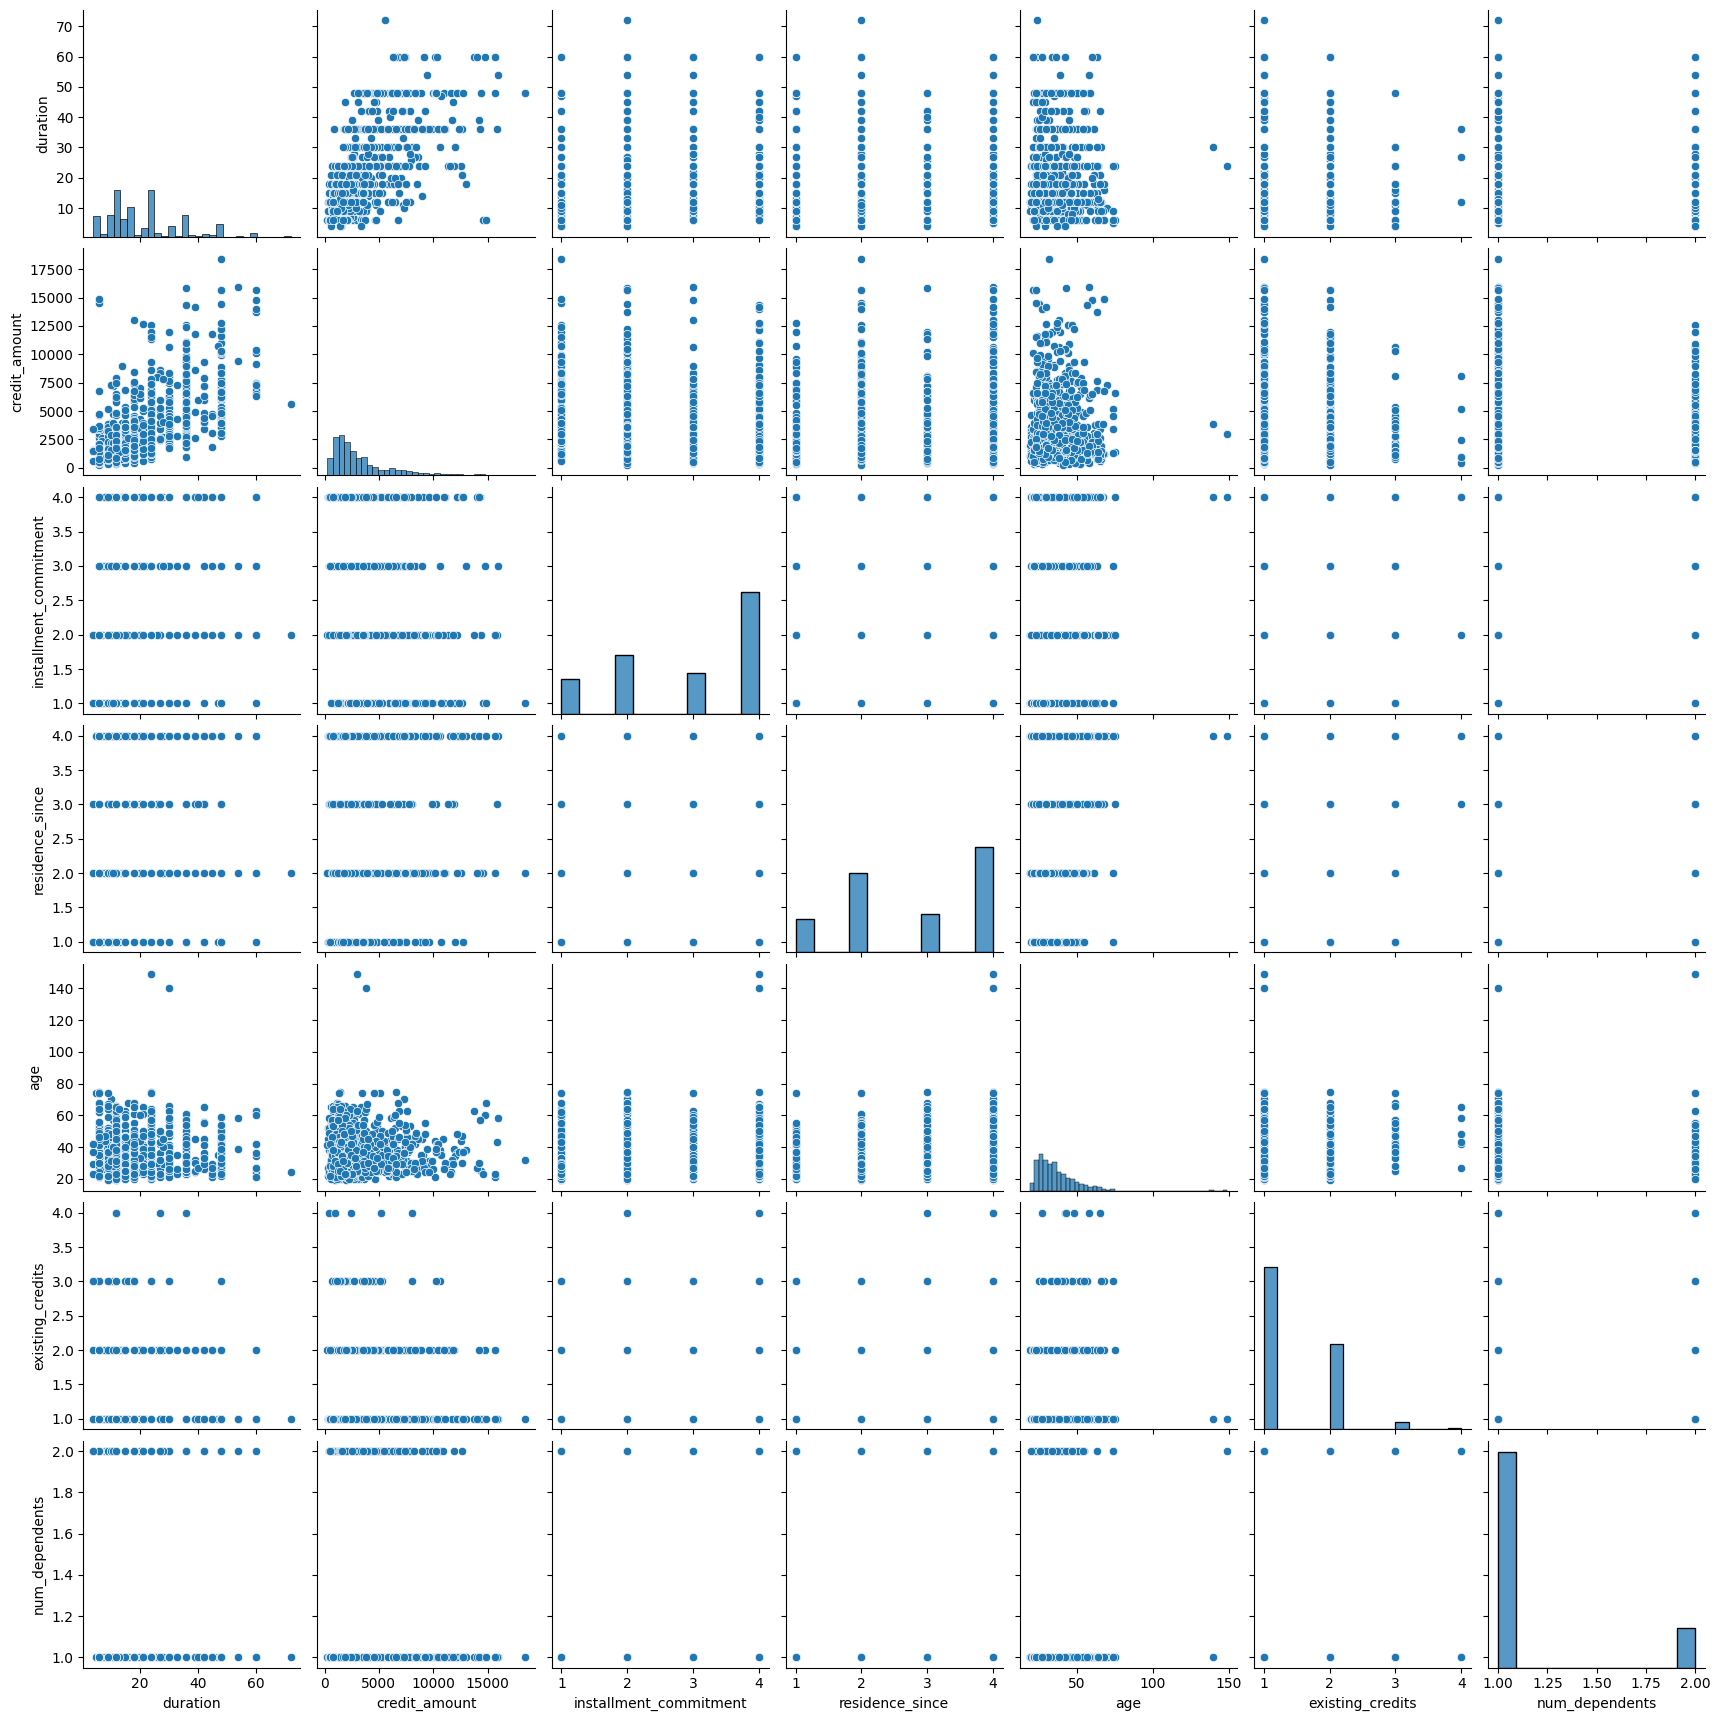

In [414]:
# Mostramos gráficamente las relaciones entre las columnas numéricas.
sb.pairplot(creditos)

In [415]:
# Calculamos la matriz de correlación entre todas las variables numéricas de nuestro conjunto de datos. Es una medida que indica el grado de relación entre dos columnas,
# con valores que varían entre -1 y 1. Añadimos el parámetro 'numeric_only' con valor True, ya que en este momento aún hay columnas con valores categóricos y habría conflictos.
creditos.corr(numeric_only = True)

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
duration,1.000000,0.624984,0.074749,0.034067,-0.025052,-0.011284,-0.023834
credit_amount,0.624984,1.000000,-0.271316,0.028926,0.030890,0.020795,0.017142
installment_commitment,0.074749,-0.271316,1.000000,0.049302,0.068450,0.021669,-0.071207
residence_since,0.034067,0.028926,0.049302,1.000000,0.261979,0.089625,0.042643
age,-0.025052,0.030890,0.068450,0.261979,1.000000,0.125871,0.124139
existing_credits,-0.011284,0.020795,0.021669,0.089625,0.125871,1.000000,0.109667
num_dependents,-0.023834,0.017142,-0.071207,0.042643,0.124139,0.109667,1.000000


<Axes: >

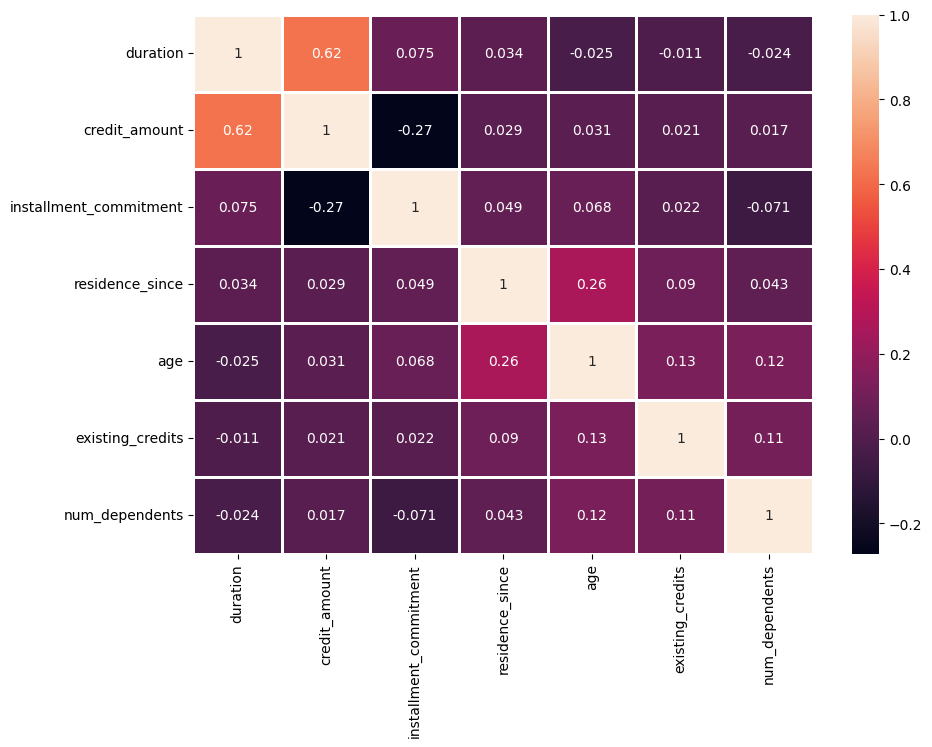

In [416]:
# Traspasamos la información anterior a un gráfico para poder así visualizarlo mejor y que sea más intuitivo.
plt.figure(figsize=(10,7))
sb.heatmap(creditos.corr(numeric_only = True), annot=True, linewidths=2)

# Las columnas que tienen más correlación entre si son "credit_amount" / "duration" (0.62) y "age" / "residence_since" (0.26), no son valores muy altos pero
# son de los más altos de este ejemplo, por lo que nos fijaremos más en ellas. La relación entre cada par de columnas es bastante clara ya que:
#  - En el primer caso, cuánto mayor sea la cantidad del crédito solicitado, la persona la cuál lo solicite va a elegir mayor tiempo para devolverlo
#  para así no quedarse sin dinero por hacerse cargo de la devolución del mismo.
#  - En el segundo caso, cuánto mayor sea la edad del cliente, más posibilidades hay de que tenga una casa propia y por consecuente, de que tenga valores en esa
#  columna en la que se guarda la información de los años que lleva viviviendo en su residencia.


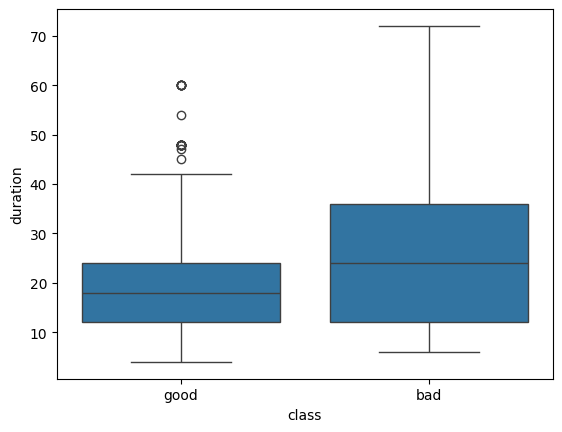

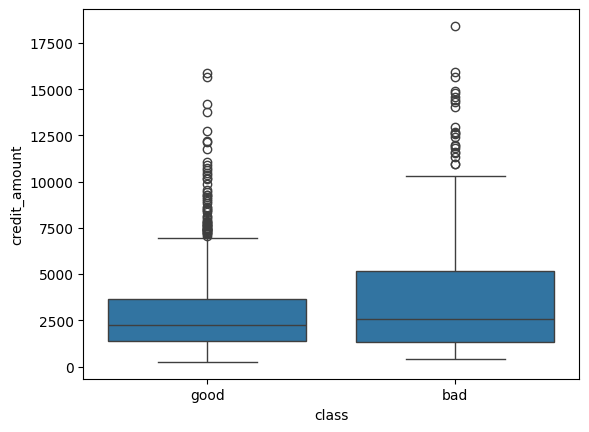

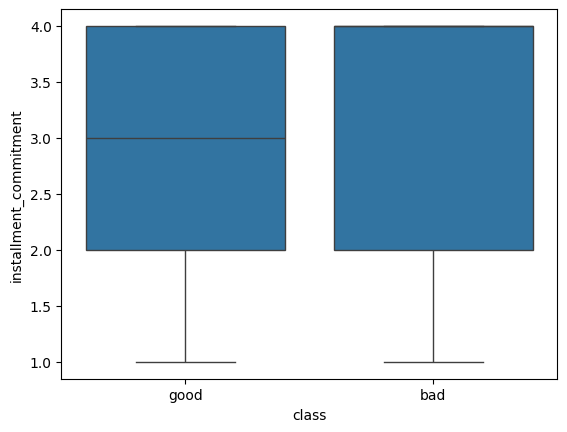

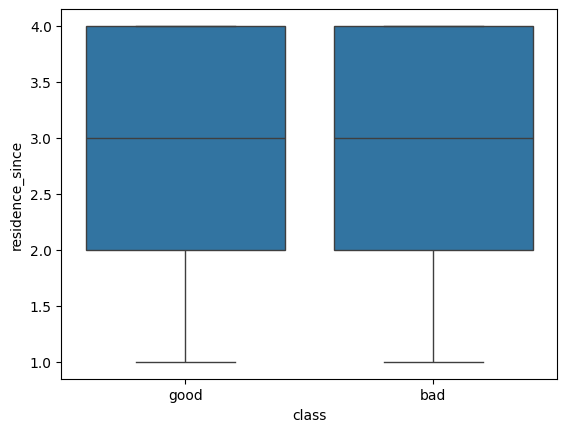

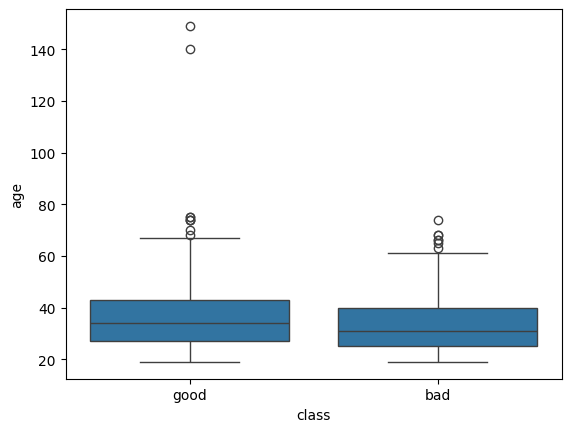

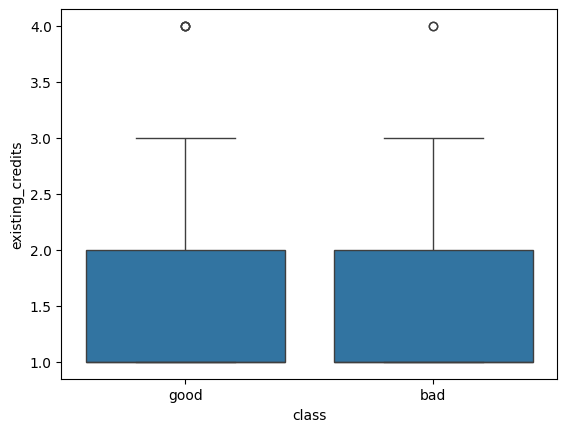

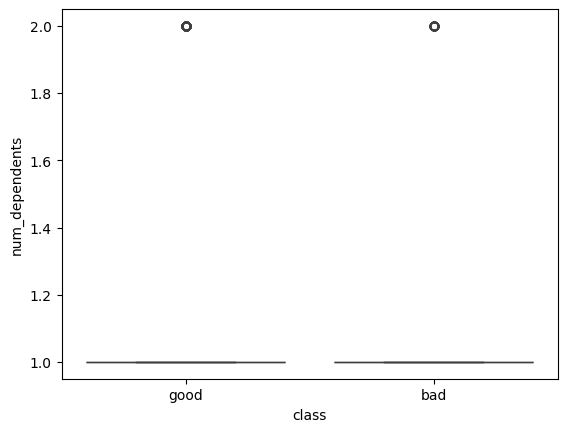

In [417]:
# Hacemos las gráficas en las que podemos ver los outliers, en ellas podemos ver si existen o no valores atípicos en cada una de las
# columnas de todas las filas en las que su etiqueta es "good" o "bad".
# Como podemos observar, excepto en las columnas "installment_commitment" y "residence_since", en las demás columnas hay outliers.
columnas_numericas = creditos.select_dtypes(include='int64').columns

for var in columnas_numericas:
    sb.boxplot(x='class', y=var, data=creditos)
    plt.show()

# En las columnas "duration", "credit_amount" y "existing_credits" vemos que los valores de los outliers son valores atípicos pero que se pueden llegar a entender
# que existan. En cambio en las otras dos ("age" y "num_dependts") las gráficas y sus valores pueden llevar a confusión. En la gráfica de la primera de ellas vemos que hay valores
# que son muy extraños, como que haya personas con 140 o más años, estos podríamos considerarlos errores incluso ya que por mucho que sean atípicos por lógica es muy difícil que
# aparezca información sobre estas personas y que se de este supuesto. En la gráfica de la segunda, podemos entender que todos los valores o los más repetidos obtienen el valor de 1
# y los atípicos toman el valor de 2, por ello no se crea gráfica entre esos dos valores porque no hay otras posibilidades entre medias.

In [418]:
# Comprobamos si existen filas con valores duplicados en nuestro dataframe.
creditos.duplicated().sum()

0

### Preprocessing

In [419]:
# Comprobamos si hay valores nulos
creditos.isnull().sum()

ID                         1
checking_status            0
duration                   0
credit_history             0
purpose                    0
credit_amount              0
savings_status             0
employment                 0
installment_commitment     0
personal_status            0
other_parties              0
residence_since            0
property_magnitude         0
age                        0
other_payment_plans        0
housing                    0
existing_credits           0
job                        0
num_dependents             0
own_telephone             10
foreign_worker             0
class                      0
dtype: int64

In [420]:
# Borrado de columnas
creditos = creditos.drop(['ID', 'own_telephone'], axis = 1)
creditos

# Borramos estas dos columnas porque:
#   - ID: valor que nunca se repite y no aporta nada a la hora del entrenamiento de la red neuronal y/o del modelo de apredizaje supervisado.
#   - Own_telephone: no veo relación por la que puede afectar a la hora de predecir si se le concederá o no el crédito al cliente.
# A estos motivos también podemos añadir que dichas columnas tienen valores nulos en las mismas y no existe una forma correcta de rellenar sus valores, por lo que
# más razones por las que deberían ser borradas del dataframe.

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,4,real estate,67,none,own,2,skilled,1,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,2,real estate,22,none,own,1,skilled,1,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,3,real estate,49,none,own,1,unskilled resident,2,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,4,life insurance,45,none,for free,1,skilled,2,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,4,no known property,53,none,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,4,real estate,31,none,own,1,unskilled resident,1,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,4,life insurance,140,none,own,1,high qualif/self emp/mgmt,1,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,4,car,38,none,own,1,skilled,1,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,4,no known property,23,none,for free,1,skilled,1,yes,bad


In [421]:
# Transformamos los valores categóricos a valores numéricos
class_label_encoder = LabelEncoder()

# Realizamos la conversión usando el método get_dummies(), que devuelve una columna por cada posibilidad de dato categórico en la que pone True/False en función de si lo tiene o no.
creditos = pd.get_dummies(creditos, columns = ['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude',
                                               'other_payment_plans', 'housing', 'job', 'foreign_worker'])

# Utlizamos el LabelEncoder en este caso ya que solo hay dos popsibilidades y es fácil de reconocer los valores que establece (bad = 0, good = 1)
creditos['class'] = LabelEncoder().fit_transform(creditos['class'])

creditos

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class,checking_status_0<=X<200,checking_status_<0,...,other_payment_plans_stores,housing_for free,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,foreign_worker_no,foreign_worker_yes
0,6,1169,4,4,67,2,1,1,False,True,...,False,False,True,False,False,True,False,False,False,True
1,48,5951,2,2,22,1,1,0,True,False,...,False,False,True,False,False,True,False,False,False,True
2,12,2096,2,3,49,1,2,1,False,False,...,False,False,True,False,False,False,False,True,False,True
3,42,7882,2,4,45,1,2,1,False,True,...,False,True,False,False,False,True,False,False,False,True
4,24,4870,3,4,53,2,2,0,False,True,...,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,1,False,False,...,False,False,True,False,False,False,False,True,False,True
996,30,3857,4,4,140,1,1,1,False,True,...,False,False,True,False,True,False,False,False,False,True
997,12,804,4,4,38,1,1,1,False,False,...,False,False,True,False,False,True,False,False,False,True
998,45,1845,4,4,23,1,1,0,False,True,...,False,True,False,False,False,True,False,False,False,True


In [422]:
# Creamos la instancia para posteriormente escalar los datos.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [423]:
# Separamos los datos de nuestro dataset en train (80%) y test (20%) y escalamos sus datos.
X = creditos.loc[:, ~creditos.columns.isin(['class'])].values
y = creditos[['class']].values

X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 3. Creación RRNN, entrenamientos, evaluaciones, predicciones y representación gráfica (4 puntos crédito)

In [424]:
print("Dimensiones conjuntos train:")
print(X_train.shape)
print(y_train.shape)

print("\nDimensiones conjuntos test:")
print(X_test.shape)
print(y_test.shape)

Dimensiones conjuntos train:
(800, 59)
(800, 1)

Dimensiones conjuntos test:
(200, 59)
(200, 1)


Decidí comparar las dos neuronas cambiándole el número de capas de cada una de ellas, usaré aún así el mismo número de neuronas pero en varias capas y también cambiaré el número de epochs para que podamos comparar la cantidad que necesita cada una de ellas para llegar a practicamente la misma accuracy.

El número de neuronas es difícil de explicar la razón por la que se escoge un valor en concreto, ya que no existe ninguna fórmula con la que diga claramente cuál es el valor que debemos escoger y todo esta basado en suposiciones.

En este caso, escogí 200 ya que a la hora de probar haciendo el accuracy era el valor que en las dos redes se podía ver el cambio bastante bien en cuánto la relación que existe entre el número de capas y los epochs a realizar para obtener el mismo accuracy.

### Red neuronal 1

In [425]:
model = Sequential() # Creamos la red neuronal.
model.add(Dense(200, input_dim=59, activation="relu")) # El 59 es por el número de las características.
model.add(Dense(1, activation='sigmoid')) # El 1 es porque la salida de esta neurona va a ser una salida binaria, que es una única salida aunque pueda tomar dos valores.

# En cuánto a las funciones de activación, escogí relu en las capas intermedias ya que es la recomendada en estos casos y sigmoid en la de salida porque reduce la misma
# a un valor de probabilidad entre 0 y 1, que puede interpretarse como la probabilidad de que la entrada pertenezca a una clase determinada.

In [426]:
# 'binary_crossentropy' como función de pérdida, 'adam' como optimizador y 'binary_accuracy' como métrica de accuracy, estas fueron las que escogí porque tanto la función
# de pérdida como la métrica de accuracy son buenas opciones para problemas de clasificación binaria como el problema de este caso. Y en cuánto al optimizador usé ese ya que es el
# más usado y conocido.

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["binary_accuracy"])

In [427]:
print(model.summary())

# Layer1 --> 200 neuronas * 59 entradas (características) + 200 sesgo = 12000 parámetros
# Layer2 --> 1 neurona * 200 neuronas capa anterior + 1 sesgo = 201 parámetros

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 200)               12000     
                                                                 
 dense_67 (Dense)            (None, 1)                 201       
                                                                 
Total params: 12201 (47.66 KB)
Trainable params: 12201 (47.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [428]:
# Pasamos los conjuntos de entreno y establecemos estos epochs, que son los epochs necesarios para poder obtener la misma accuracy que la otra red neuronal con distinta configuración.
# Escogemos también un tamaño de batch pequeño para que así el entrenamiento sea más rápido que si cogemos un mayor tamaño. Añadimos el parámetro verbose con valor 1 para que nos
# muestre el proceso del entrenamiento de la red neuronal.

grafica = model.fit(X_train, y_train, epochs=35, batch_size=128, verbose=1)

Epoch 1/35
7/7 [==============================] - 1s 4ms/step - loss: 0.6462 - binary_accuracy: 0.6325
Epoch 2/35
7/7 [==============================] - 0s 3ms/step - loss: 0.5385 - binary_accuracy: 0.7262
Epoch 3/35
7/7 [==============================] - 0s 3ms/step - loss: 0.4901 - binary_accuracy: 0.7538
Epoch 4/35
7/7 [==============================] - 0s 4ms/step - loss: 0.4597 - binary_accuracy: 0.7775
Epoch 5/35
7/7 [==============================] - 0s 3ms/step - loss: 0.4405 - binary_accuracy: 0.7862
Epoch 6/35
7/7 [==============================] - 0s 3ms/step - loss: 0.4253 - binary_accuracy: 0.7975
Epoch 7/35
7/7 [==============================] - 0s 3ms/step - loss: 0.4129 - binary_accuracy: 0.8100
Epoch 8/35
7/7 [==============================] - 0s 3ms/step - loss: 0.4009 - binary_accuracy: 0.8125
Epoch 9/35
7/7 [==============================] - 0s 3ms/step - loss: 0.3909 - binary_accuracy: 0.8288
Epoch 10/35
7/7 [==============================] - 0s 3ms/step - loss: 0.

In [429]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.5772 - binary_accuracy: 0.7450


[0.5772190093994141, 0.7450000047683716]

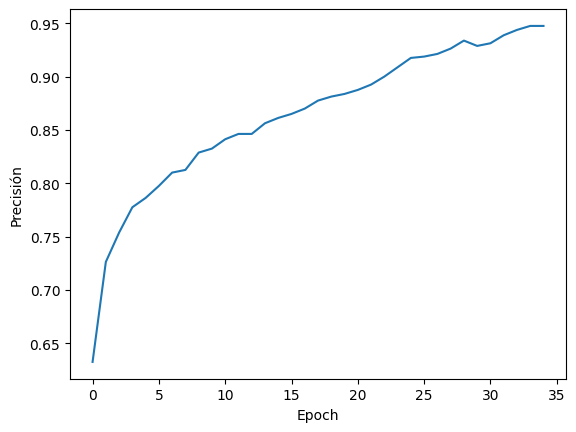

In [430]:
# Mostramos la gráfica en la que podemos observar como la accuracy va aumentando a lo largo de los epochs. En los primeros de ellos es donde podemos ver la mayor diferencia y crecimiento,
# al contrario de lo que pasa en los últimos ya que al tener menos margen de mejora ya la diferencia es menos reconocible.

plt.xlabel("Epoch")
plt.ylabel("Precisión")
plt.plot(grafica.history["binary_accuracy"])

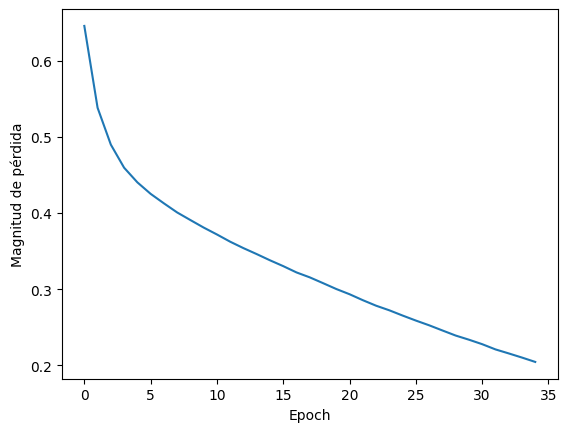

In [431]:
# En este caso mostramos la gráfica en la que podemos ver como la función de pérdida va bajando de forma considerable a lo largo de los epochs. Vuelve a pasar como en el caso anterior,
# la diferencia más notable se puede observar en los primeros epochs, cuánto más nos acercamos al final de los mismos, la diferencia entre unos y otros es cada vez menor.

plt.xlabel("Epoch")
plt.ylabel("Magnitud de pérdida")
plt.plot(grafica.history["loss"])

### Red neuronal 2

In [432]:
model_2 = Sequential() # Creamos la red neuronal.
model_2.add(Dense(100, input_dim=59, activation="relu")) # El 59 es por el número de las características.
model_2.add(Dense(50, activation="relu"))
model_2.add(Dense(50, activation="relu"))
model_2.add(Dense(1, activation='sigmoid')) # El 1 es porque la salida de esta neurona va a ser una salida binaria, que es una única salida aunque pueda tomar dos valores.

# Las funciones de activación son las mismas que en el caso anterior, las cuáles están explicadas atrás.

In [433]:
# Más de lo mismo con las funciones de pérdida, optimizador y métrica de accuracy.

model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=["binary_accuracy"])

In [434]:
print(model_2.summary())

# Layer1 --> 100 neuronas * 59 entradas (características) + 100 sesgo = 6000 parámetros
# Layer2 --> 50 neurona * 100 neuronas capa anterior + 50 sesgo = 5050 parámetros
# Layer3 --> 50 neurona * 50 neuronas capa anterior + 50 sesgo = 2550 parámetros
# Layer4 --> 1 neurona * 50 neuronas capa anterior + 1 sesgo = 51 parámetros

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 100)               6000      
                                                                 
 dense_69 (Dense)            (None, 50)                5050      
                                                                 
 dense_70 (Dense)            (None, 50)                2550      
                                                                 
 dense_71 (Dense)            (None, 1)                 51        
                                                                 
Total params: 13651 (53.32 KB)
Trainable params: 13651 (53.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [435]:
# Lo único que cambiamos aquí es el número de epochs, establecemos estos ya que eran los que daban ya un valor de accuracy bastante bueno, podríamos haber puesto más y acercarnos más
# al accuracy 1, pero sería ya rozar el overfitting aparte de necesitar aumentar bastante el número de epochs del entrenamiento de la red anterior para poder lograr que llegasen al mismo
# o muy próximo accuracy.

grafica_2 = model_2.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1)

Epoch 1/20
7/7 [==============================] - 1s 4ms/step - loss: 0.6539 - binary_accuracy: 0.5987
Epoch 2/20
7/7 [==============================] - 0s 3ms/step - loss: 0.5673 - binary_accuracy: 0.7063
Epoch 3/20
7/7 [==============================] - 0s 3ms/step - loss: 0.5354 - binary_accuracy: 0.7088
Epoch 4/20
7/7 [==============================] - 0s 3ms/step - loss: 0.4993 - binary_accuracy: 0.7387
Epoch 5/20
7/7 [==============================] - 0s 3ms/step - loss: 0.4721 - binary_accuracy: 0.7725
Epoch 6/20
7/7 [==============================] - 0s 3ms/step - loss: 0.4458 - binary_accuracy: 0.7887
Epoch 7/20
7/7 [==============================] - 0s 3ms/step - loss: 0.4224 - binary_accuracy: 0.7987
Epoch 8/20
7/7 [==============================] - 0s 4ms/step - loss: 0.4016 - binary_accuracy: 0.8163
Epoch 9/20
7/7 [==============================] - 0s 4ms/step - loss: 0.3800 - binary_accuracy: 0.8350
Epoch 10/20
7/7 [==============================] - 0s 3ms/step - loss: 0.

In [436]:
model_2.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6232 - binary_accuracy: 0.7500


[0.6231826543807983, 0.75]

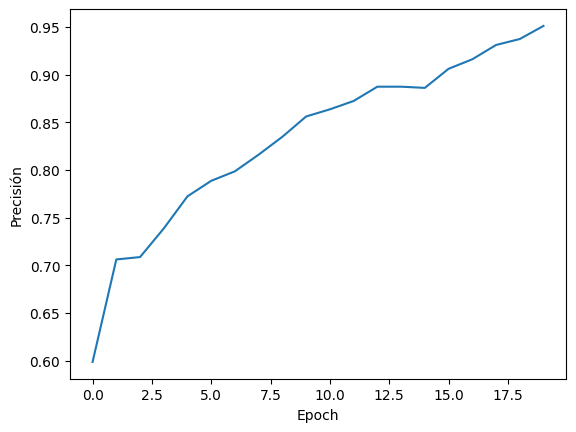

In [437]:
# Mostramos la gráfica de la evolución de la accuracy a lo largo de los epochs.

plt.xlabel("Epoch")
plt.ylabel("Precisión")
plt.plot(grafica_2.history["binary_accuracy"])

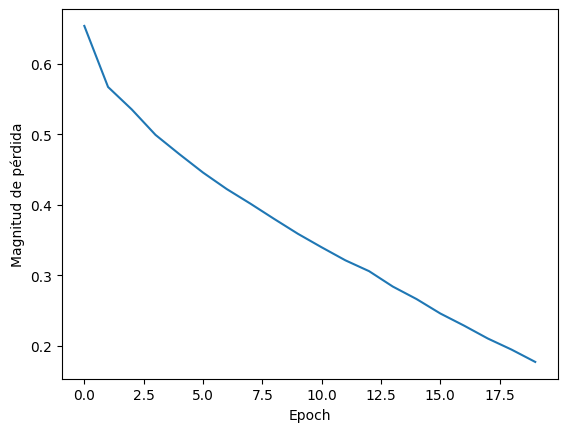

In [438]:
# Mostramos la gráfica de la función de pérdida y observamos como baja a lo largo del paso de los epochs.

plt.xlabel("Epoch")
plt.ylabel("Magnitud de pérdida")
plt.plot(grafica_2.history["loss"])

Depués de haber entrenado las dos redes neuronales y explicar previamente antes de hacerlo los cambios que iba a realizar en ellas, podemos ahora comparar los resultados y sacar conclusiones sobre los mismos.

Las dos redes tienen el mismo número de nueronas pero con distinto número de capas. La segunda red (4 capas) consiguió una accuracy entorno al 0.94 / 0.95 con 20 epochs, mientras que la primera de ellas (2 capas) alcanzó una accuracy entorno al 0.94 con un número superior de epochs (35 epochs). Gracias a esto podemos decir que una de las características o configuraciones más importante a la hora de crear una red neuronal es su número de capas. Ya que como pudimos ver en este ejemplo de comparación, al tener más capas (teniendo el mismo número de neuronas) el entrenamiento necesita un menor número de epochs para obtener una buena accuracy y por lo tanto también reduce el costo computacional del mismo.

## 4. Selección de otro modelo de aprendizaje supervisado (2 puntos)

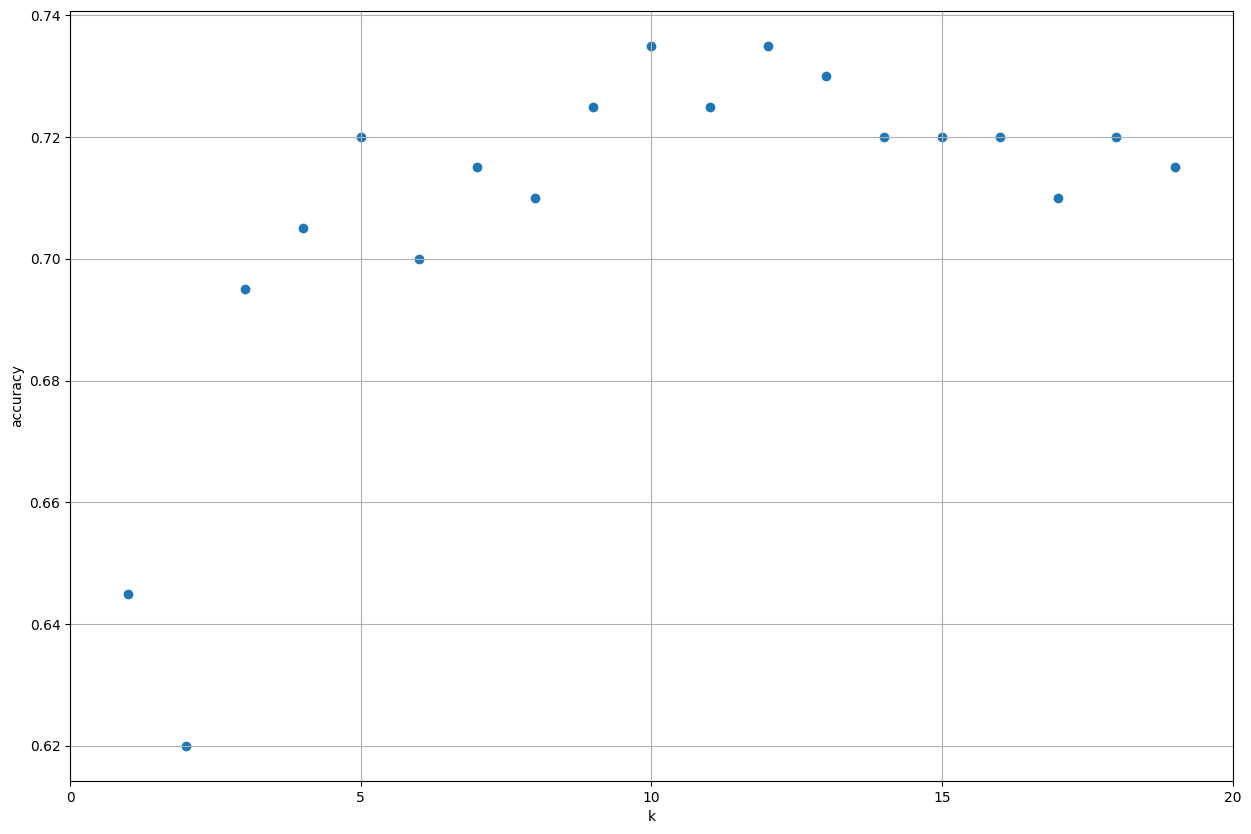

In [439]:
# Escogí el KNN para así comparar uno de los modelos de aprendizaje más sencillos de entender y de implementar con las redes neuronales, las cuáles son más difíciles de entender
# su funcionamiento y que consumen un mayor número de recursos computacionales.

# Calculamos el mejor valor para K.
k_range = range(1, 20)
scores = []

for k in k_range:
      knn = KNeighborsClassifier(n_neighbors = k)
      knn.fit(X_train, y_train)
      scores.append(knn.score(X_test, y_test))
plt.figure(figsize=(15,10))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.grid(True)

In [445]:
# Establecemos el número de vecinos que usaremos para el modelo.
n_neighbors = 10

# Creamos el modelo.
knn = KNeighborsClassifier(n_neighbors)

In [446]:
# Entrenamos el modelo.
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [447]:
# Imprimimos la precisión del algoritmo
print('Precisión del algoritmo KNN en el dataset de entrenamiento: {:.2f}'
      .format(knn.score(X_train, y_train)))
print('Precisión del algoritmo KNN en el dataset de test: {:.2f}'
      .format(knn.score(X_test, y_test)))

Precisión del algoritmo KNN en el dataset de entrenamiento: 0.80
Precisión del algoritmo KNN en el dataset de test: 0.73


In [448]:
# Realizamos las predicciones
pred = knn.predict(X_test)

# Mostramos la matriz de confusión que compara las clases verdaderas con las predichas.
print(confusion_matrix(y_test, pred))


print('\n', classification_report(y_test, pred))

# Como podemos ver la precisión a la hora de predecir de forma correcta las entradas no es muy elevada en ninguna de las dos posibilidades, por ello
# obtenemos un valor de score tan bajo.

[[ 24  40]
 [ 13 123]]

               precision    recall  f1-score   support

           0       0.65      0.38      0.48        64
           1       0.75      0.90      0.82       136

    accuracy                           0.73       200
   macro avg       0.70      0.64      0.65       200
weighted avg       0.72      0.73      0.71       200



In [449]:
# Sacamos el score del modelo.
knn.score(X_test, y_test)

0.735

## 5. Análisis comparativo y Conclusiones (2 puntos)

Tras la comparación y la explicación de los cambios de los parámetros de las dos redes neuronales creadas anteriormente, ahora vamos a comparar los resultados de las dos (ya que como explicamos cambiamos sus características para que las dos llegasen al mismo valor de accuracy) con el resultado del modelo de aprendizaje supervisado elegido, en este caso el KNN.

Como podemos observar, el KNN no alcanza la precisión de predicción que pueden llegar a conseguir cualquiera de las dos redes neuronales anteriores. Esto puede ser por varios motivos:
- Su complejidad: las redes neuronales especialmente aquellas con múltiples capas (como en el caso de la segunda de ellas), tienen una capacidad de modelado más alta en comparación con el KNN. Esto les permite capturar patrones más complejos en los datos, lo que puede dar lugar a un mejor rendimiento.
- La naturaleza de los datos: en este caso los datos no tienen mucha correlación entre los mismos (como pudimos ver en la matriz de correlación en el apartado de EDA) por lo que sus relaciones son más complejas. Esto hace que las redes neuronales tengan una cierta ventaja a la hora de procesarlas frente al KNN.

Descarto que otros aspectos como el preprocesamiento y el escalado de los datos sean algo condicionante para la gran diferencia entre unos valores y otros, ya que se usan los mismos datos para los tres casos (las dos redes neuronales y el KNN). También puedo descartar que el valor de K a la hora de crear el KNN sea un factor muy importante ya que estuve probando con valores tanto más altos como más bajos y la diferencia del score podía variar entre 1 o 2 al que obtenemos con el ya elegido.

A la hora de elegir una de las tres opciones anteriores me quedaría sin duda con la segunda red neuronal. Tiene un valor muy alto de accuracy y usa un menor número de epochs en comparación con la otra (lo que la mejora en cuánto a uso de recursos computacionales). Descarto desde primer momento el KNN ya que no le ví margen de mejora aún así cambiando sus parámetros y porque queda bastante lejos de lo que se podía considerar un rival de las otras dos redes neuronales.

Creo que logré obtener una configuración bastante buena de la segunda red neuronal, como podemos ver en sus valores del accuracy, muy cerca del valor absoluto pero sin caer en el overfitting.